<a href="https://colab.research.google.com/github/madrigaljose/madrigaljose/blob/main/20210713_Madrigal_NeuralProphet_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Example

In [3]:
!pip install neuralprophet
import pandas as pd
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed 

set_random_seed(0)
data = pd.read_csv('./data/seattleWeather_1948-2017.csv')
data.head(10)

     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 748.8MB 22kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102


FileNotFoundError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
prcp_data = data.rename(columns={'DATE': 'ds', 'PRCP': 'y'})[['ds', 'y']]
prcp_data.head(10)

,ds,y
0,1948-01-01,0.47
1,1948-01-02,0.59
2,1948-01-03,0.42
3,1948-01-04,0.31
4,1948-01-05,0.17
5,1948-01-06,0.44
6,1948-01-07,0.41
7,1948-01-08,0.04
8,1948-01-09,0.12
9,1948-01-10,0.74


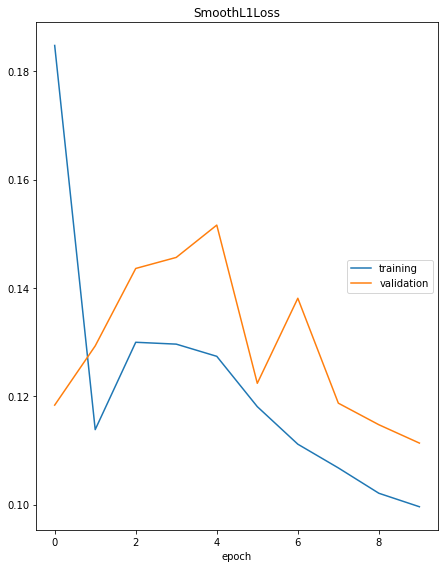

Epoch[10/10]: 100%|██████████| 10/10 [00:10<00:00,  1.04s/it, SmoothL1Loss=0.0996, MAE=0.124, RegLoss=0, MAE_val=0.132, SmoothL1Loss_val=0.111]


In [ ]:
import time
time.sleep(20)
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



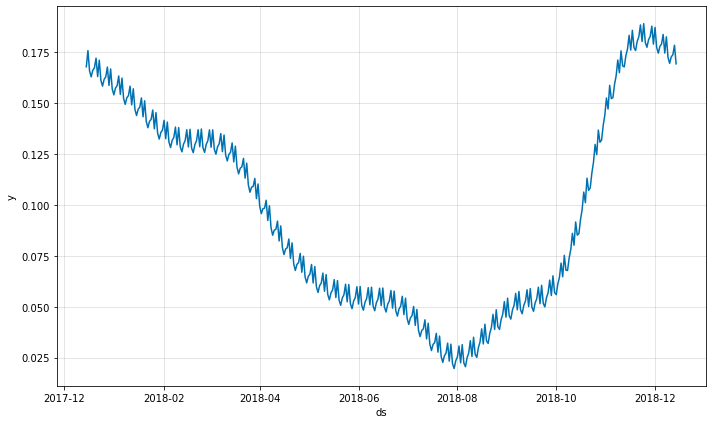

In [ ]:
future = model.make_future_dataframe(prcp_data, periods=365)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



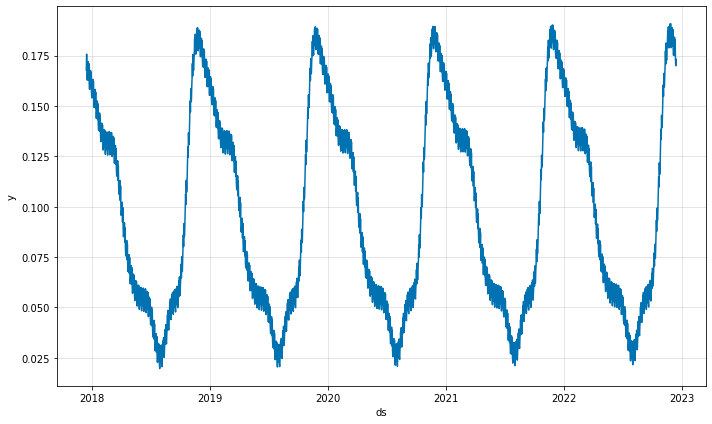

In [ ]:
future = model.make_future_dataframe(prcp_data, periods=365*5)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

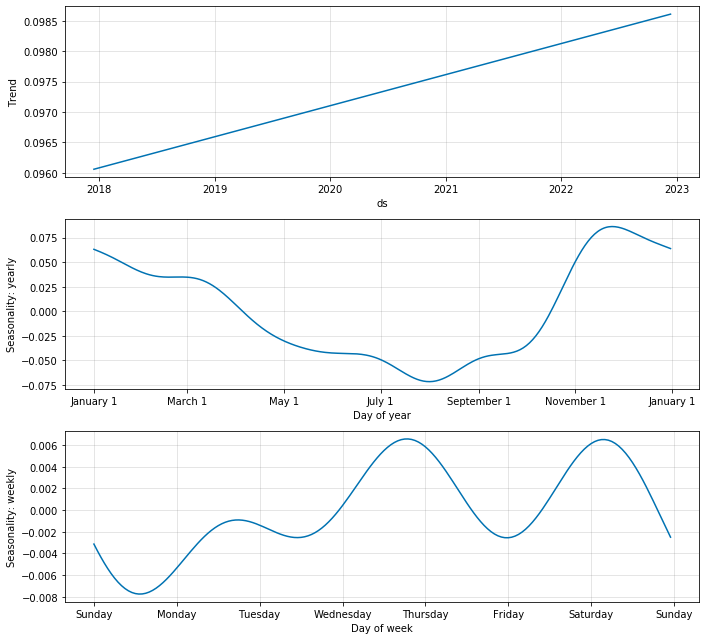

In [ ]:
fig_comp = model.plot_components(forecast)

## Trend

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.63)
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'S&P 500 Prices')

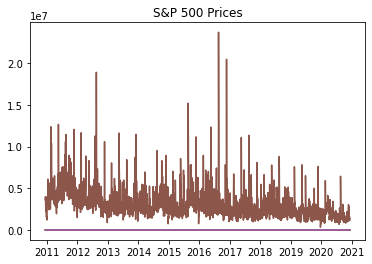

In [7]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
import pandas_datareader.data as pdr
import yfinance as yf



[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'S&P 500 Prices')

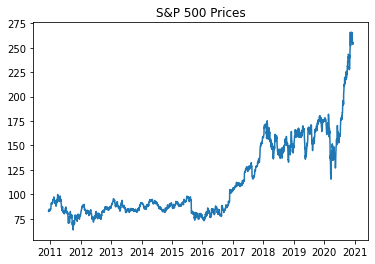

In [14]:
yf.pdr_override()
#data = pdr.get_data_yahoo('DE', start, end)
#data = data[['High']]  
#data.tail()


start = datetime(2010, 12, 13)
end = datetime(2020, 12, 11)
sp500_data = pdr.get_data_yahoo('DE', start, end)
sp500_data['sp500'] = sp500_data[['High']]  
sp500_data = sp500_data[['sp500']]
#plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

In [15]:
sp500_data = sp500_data.reset_index().rename(columns={'Date': 'ds', 'sp500': 'y'})
sp500_data.head(10)

,ds,y
0,2010-12-13,82.989998
1,2010-12-14,82.989998
2,2010-12-15,83.389999
3,2010-12-16,82.459999
4,2010-12-17,82.330002
5,2010-12-20,82.669998
6,2010-12-21,84.849998
7,2010-12-22,84.669998
8,2010-12-23,83.980003
9,2010-12-27,83.760002


In [16]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)

metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 585, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[100/100]: 100%|██████████| 100/100 [00:11<00:00,  8.57it/s, SmoothL1Loss=0.00265, MAE=5.21, RegLoss=0.00112, MAE_val=31.9, SmoothL1Loss_val=0.0693]


In [17]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

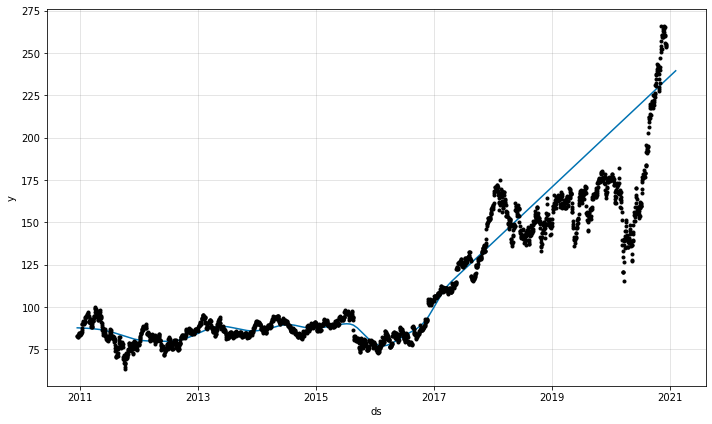

In [18]:
plot_forecast(model, sp500_data, periods=60)

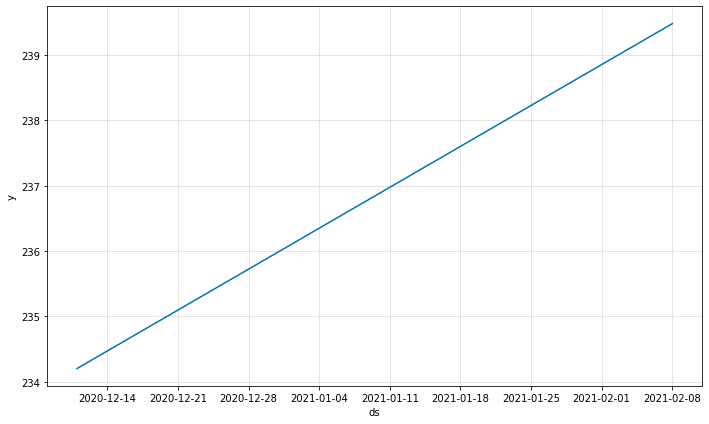

In [21]:
plot_forecast(model, sp500_data, periods=60, historic_pred=False)

## Seasonality

In [22]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=True,
                      weekly_seasonality=False,
                      daily_seasonality=False)

metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

INFO: nprophet.config - __post_init__: Note: Trend changepoint regularization is experimental.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 585, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[100/100]: 100%|██████████| 100/100 [00:14<00:00,  7.09it/s, SmoothL1Loss=0.00237, MAE=4.94, RegLoss=0.0036, MAE_val=41.5, SmoothL1Loss_val=0.113]


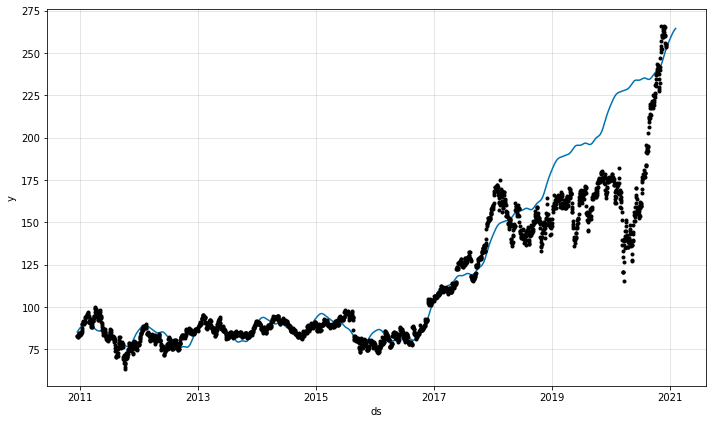

In [24]:
plot_forecast(model, sp500_data, periods=60, historic_pred=True)

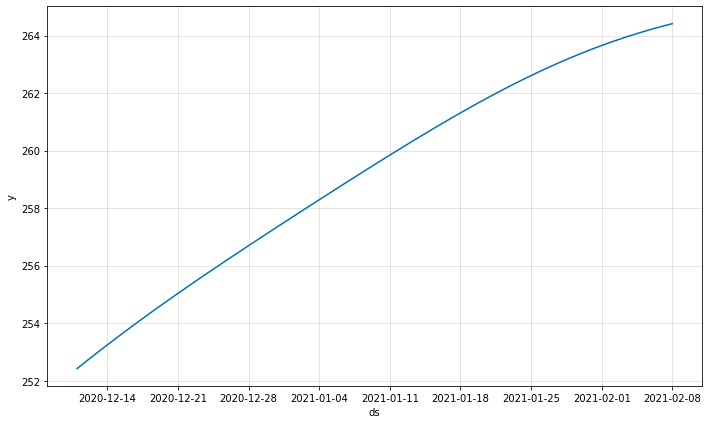

In [25]:
plot_forecast(model, sp500_data, periods=60, historic_pred=False)

## Using AR-Net

In [26]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    changepoints_range=0.95,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)

model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 1134 missing dates were added.
INFO: nprophet - _handle_missing_data: 1134 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [00:54<00:00,  1.82it/s, SmoothL1Loss=0.000929, MAE=4.01, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.280305,75.503727,0.0
1,0.017505,18.301294,0.0
2,0.004615,9.213936,0.0
3,0.002896,7.145935,0.0
4,0.003208,7.246862,0.0
...,...,...,...
95,0.000968,4.097265,0.0
96,0.000957,4.075574,0.0
97,0.000945,4.038926,0.0
98,0.000934,4.022386,0.0


INFO: nprophet - _handle_missing_data: 1134 missing dates were added.
INFO: nprophet - _handle_missing_data: 1134 NaN values in column y were auto-imputed.


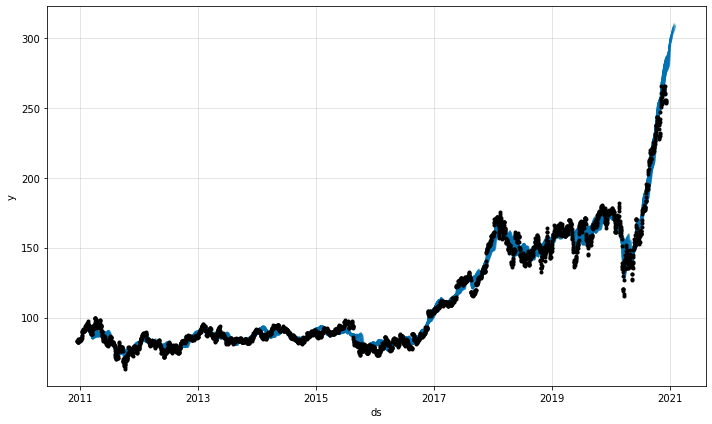

In [27]:
plot_forecast(model, sp500_data, periods=60, historic_pred=True)

INFO: nprophet - _handle_missing_data: 25 missing dates were added.
INFO: nprophet - _handle_missing_data: 25 NaN values in column y were auto-imputed.


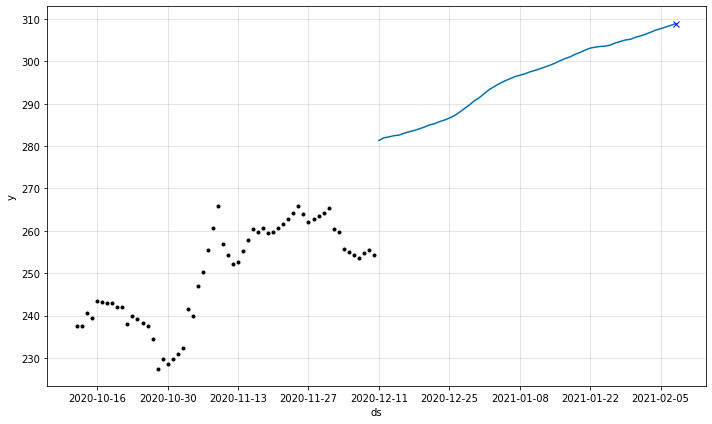

In [28]:
plot_forecast(model, sp500_data, periods=60, historic_pred=False, highlight_steps_ahead=60)

## Events

In [29]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    changepoints_range=0.95,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)

model = model.add_country_holidays("US", mode="additive", lower_window=-1, upper_window=1)

model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO: nprophet - _handle_missing_data: 1134 missing dates were added.
INFO: nprophet - _handle_missing_data: 1134 NaN values in column y were auto-imputed.
Epoch[100/100]: 100%|██████████| 100/100 [01:05<00:00,  1.54it/s, SmoothL1Loss=0.000959, MAE=4.06, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.105356,41.869835,0.0
1,0.008647,12.215736,0.0
2,0.003089,7.274915,0.0
3,0.003326,7.490053,0.0
4,0.004156,8.369102,0.0
...,...,...,...
95,0.000989,4.146843,0.0
96,0.000977,4.101924,0.0
97,0.000972,4.113343,0.0
98,0.000965,4.069369,0.0


INFO: nprophet - _handle_missing_data: 1134 missing dates were added.
INFO: nprophet - _handle_missing_data: 1134 NaN values in column y were auto-imputed.


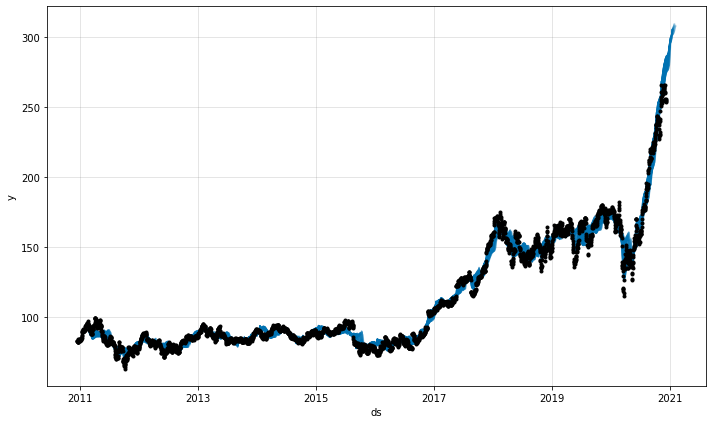

In [30]:
plot_forecast(model, sp500_data, periods=60, historic_pred=True)

INFO: nprophet - _handle_missing_data: 25 missing dates were added.
INFO: nprophet - _handle_missing_data: 25 NaN values in column y were auto-imputed.


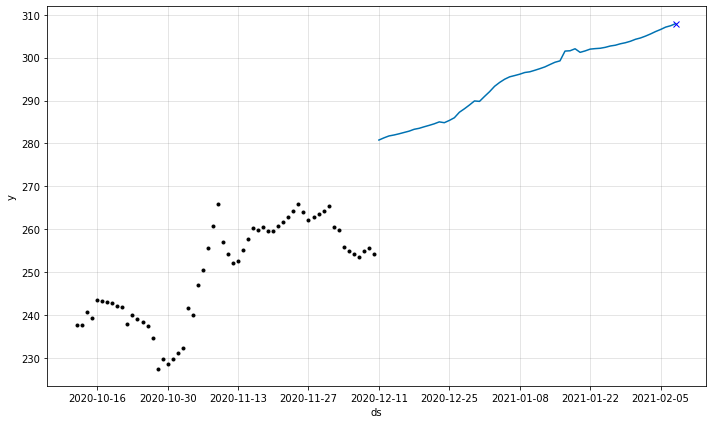

In [31]:
plot_forecast(model, sp500_data, periods=60, historic_pred=False, highlight_steps_ahead=60)